### Loading the required libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

RANDOM_SEED =7124
LABELS = ["Normal", "Fraud"]

In [44]:
# Reading the data and lookng at the structure of the data. This data has 30 attributes and 1 lakh records
data = pd.read_csv("Fraud_data_amtstd.csv")
data.shape

(100000, 30)

In [45]:
#Looking at a sample of records
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.836500,-0.545419,-0.462979,0.537174,-0.426143,-0.100606,-0.584764,-0.103956,2.268429,-0.365185,...,0.085111,0.410736,0.137625,0.602906,-0.350260,0.464407,-0.070917,-0.030486,0.049882,0
1,-4.289880,-2.576061,-0.092256,1.976405,2.810033,-2.669128,-0.981883,-0.470310,-0.025692,0.099528,...,-0.473240,-0.307295,-2.789549,0.578976,-0.837979,0.372843,0.353451,-1.662202,-0.347171,0
2,1.131318,0.139818,0.586921,1.069291,-0.334908,-0.204938,-0.135526,0.043821,-0.121117,0.182139,...,-0.028126,-0.167062,-0.048054,-0.009912,0.417694,-0.479793,0.024360,0.023878,-0.208963,0
3,-0.866956,1.373947,1.948343,2.686750,-0.366790,0.568632,-0.278349,0.739536,-1.655955,0.708396,...,0.022719,-0.070619,-0.080307,0.000816,0.092167,0.159131,0.157940,-0.014370,-0.253595,0
4,-0.842670,1.401843,0.927235,1.070402,0.843883,0.467333,0.366716,0.616739,-1.586963,0.000041,...,0.036573,-0.182581,-0.226834,-1.029794,-0.118762,-0.228960,-0.024250,0.046547,-0.346230,0
5,1.178458,0.166055,-0.101567,0.369453,0.017198,-0.722891,0.396639,-0.187978,-0.483147,0.083094,...,-0.323048,-1.083814,0.049838,-0.002872,0.295810,0.135883,-0.074191,0.004364,-0.150527,0
6,1.869017,-0.202287,-0.218739,1.496434,-0.403332,-0.013593,-0.342586,0.129402,0.911017,0.149568,...,-0.458963,-1.058509,0.439679,-0.066668,-0.376792,-1.125226,0.053537,-0.039380,-0.305050,0
7,1.335053,0.331464,-2.057763,-0.346175,2.583234,2.854102,-0.187547,0.685154,-0.286614,-0.535903,...,-0.191820,-0.650118,-0.114069,0.915936,0.730073,0.383879,-0.031902,0.029849,-0.347171,0
8,1.787763,-0.737892,-0.185794,0.362758,-0.550775,0.676564,-0.932369,0.390445,1.349983,-0.136095,...,0.331025,1.223539,0.264791,-0.541170,-0.571339,0.812785,0.017984,-0.054691,-0.232691,0
9,-1.055540,0.942471,0.986697,1.560551,-0.138755,-0.253645,0.622974,-0.321826,-0.215914,0.816454,...,0.153985,0.985031,0.204281,0.455561,-0.456576,-0.244140,-0.833487,-0.419773,-0.173549,0


0    99508
1      492
Name: Class, dtype: int64


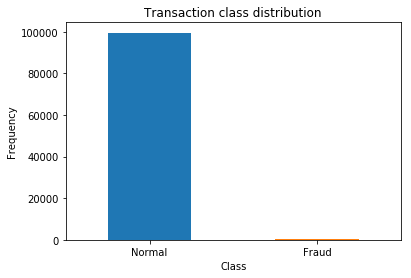

In [46]:
#PLotting the frequencies of fraud and non-fraud transactions in the data
count_classes = pd.value_counts(data['Class'], sort = True)
print(count_classes)

#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0)

#Giving titles and labels to the plot
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [47]:
from sklearn.model_selection import train_test_split
#Converting data to array
data = np.array(data)

In [48]:
#Splitting the data into train and test and observing their dimensions
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
print(X_train.shape)
print(X_test.shape)

(80000, 30)
(20000, 30)


In [49]:
#Obtaining the fraud and non-fraud records in train
print(np.unique(X_train[:,29],return_counts=True))
print(np.unique(X_test[:,29],return_counts=True))

(array([0., 1.]), array([79591,   409], dtype=int64))
(array([0., 1.]), array([19917,    83], dtype=int64))


In [50]:
#Now consider only the non-fraud records for training
X_train_NF = X_train[X_train[:,-1] == 0]
X_train_NF = X_train_NF[:,:-1]
print(X_train_NF.shape)

(79591, 29)


In [51]:
#Separating out the fraud records from the train 
X_train_F = X_train[X_train[:,-1] == 1]
print(X_train_F.shape)

(409, 30)


In [52]:
#Adding/concatenating the fraud records from train data to the test
X_test=np.concatenate((X_test,X_train_F),axis=0)
print(X_test.shape)

(20409, 30)


In [53]:
X_test,X_eval = train_test_split(X_test, test_size=0.2, random_state=RANDOM_SEED)

In [54]:
print(X_test.shape)
print(X_eval.shape)

(16327, 30)
(4082, 30)


In [55]:
#Separating the independent and the class variable
y_test = X_test[:,-1]
X_test = X_test[:,:-1]

In [56]:
#Expanding the dimensions of y for later concatenation
y_test = np.expand_dims(y_test, axis=1)
y_test.shape

(16327, 1)

## Model Building

In [57]:
print(X_train_NF.shape)
input_dim = X_train_NF.shape[1]
encoding_dim = 15

(79591, 29)


In [58]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='linear'))

In [59]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

In [ ]:
hist = []
for _ in range(100):
    hist.append(autoencoder.fit(X_train_NF, X_train_NF,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                     validation_split=0.3,
                    verbose=1).history)

Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 27s 478us/step - loss: 0.6801 - mean_squared_error: 0.6801 - val_loss: 0.3655 - val_mean_squared_error: 0.3655
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 22s 403us/step - loss: 0.4060 - mean_squared_error: 0.4060 - val_loss: 0.2559 - val_mean_squared_error: 0.2559
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 26s 471us/step - loss: 0.3674 - mean_squared_error: 0.3674 - val_loss: 0.2344 - val_mean_squared_error: 0.2344A: 25s - loss: 0.3436 - mean_square - ETA: 30s - loss: 0.3390 - mean_squared_error: 0.3 - ETA: 28s - loss: 0.3390 - mean_squared_error:  - ETA: 27s - loss: 0.3376 - mean_squar - ETA: 24s - loss: 0.3394 - mean_square - ETA: 22s  - ETA: 3s - loss: 0.3674 
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [====================

55713/55713 [==============================] - 24s 439us/step - loss: 0.3346 - mean_squared_error: 0.3346 - val_loss: 0.2245 - val_mean_squared_error: 0.2245loss: 0.3427 - mean_squar - ETA: 6s - loss: 0 - ETA: 0s - loss: 0.3344 - 
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 23s 411us/step - loss: 0.3305 - mean_squared_error: 0.3305 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 24s 426us/step - loss: 0.3302 - mean_squared_error: 0.3302 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 25s 442us/step - loss: 0.3305 - mean_squared_error: 0.3305 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Train on 55713 samples, validate on 23878 samples
Epoch 1/1
55713/55713 [==============================] - 23s 412u

In [22]:
hist[0:5]

[{'val_loss': [0.33405528783259036],
  'val_mean_squared_error': [0.33405528783259036],
  'loss': [0.6574461971794147],
  'mean_squared_error': [0.6574461971794147]},
 {'val_loss': [0.2524798494685744],
  'val_mean_squared_error': [0.2524798494685744],
  'loss': [0.39722355654259534],
  'mean_squared_error': [0.39722355654259534]},
 {'val_loss': [0.23742848752041998],
  'val_mean_squared_error': [0.23742848752041998],
  'loss': [0.3614965733514152],
  'mean_squared_error': [0.3614965733514152]},
 {'val_loss': [0.23097310399018656],
  'val_mean_squared_error': [0.23097310399018656],
  'loss': [0.35076765617275096],
  'mean_squared_error': [0.35076765617275096]},
 {'val_loss': [0.23219408737970604],
  'val_mean_squared_error': [0.23219408737970604],
  'loss': [0.34823538132079157],
  'mean_squared_error': [0.34823538132079157]}]

In [23]:
## Making predictions on the train data
predictions=autoencoder.predict(X_train_NF)

predictions[0:2]

array([[-1.6033593 ,  0.94757324,  1.7551892 ,  0.8572338 , -0.8328218 ,
         0.5189227 , -0.5616846 ,  1.1336945 ,  0.4842893 , -0.8036911 ,
        -1.416091  ,  0.28365517, -0.92414784, -0.14528751, -1.8320006 ,
        -0.4907556 ,  0.530109  ,  0.00432374,  0.2000157 , -0.05800389,
         0.00736931,  0.07622877, -0.0389892 , -0.06887589, -0.03673813,
        -0.00719737,  0.00309072,  0.09111511, -0.23702683],
       [ 1.2884982 , -0.31085998,  0.12979531, -0.4310326 , -0.71386033,
        -1.4945496 , -0.05842292, -0.3626615 , -0.9554357 ,  0.61991006,
         0.3646551 , -0.22123933,  0.4042024 , -0.03933859,  0.11359358,
         0.04138162,  0.13468468, -0.01329425,  0.05333993, -0.09490938,
        -0.01446912,  0.00730772, -0.0052765 , -0.0423546 , -0.03087896,
        -0.08038861,  0.00960309,  0.00466691, -0.18897496]],
      dtype=float32)

In [24]:
##We want to separate out fraud records and non-fraud records for later use
f = np.hstack((X_test,y_test))
print(f.shape)

test_nf=f[f[:,29]==0]
print(test_nf.shape)

test_f=f[f[:,29]==1]
print(test_f.shape)

(16327, 30)
(15942, 30)
(385, 30)


In [25]:
#Getting the errors from the non fraud data separately 
autoencoder.evaluate(test_nf[:,:29],test_nf[:,:29])

15942/15942 [==============================] - 3s 202us/step


[0.23103991510626243, 0.23103991510626243]

In [26]:
#Getting the errors from the fraud data separately
autoencoder.evaluate(test_f[:,:29],test_f[:,:29])

385/385 [==============================] - 0s 223us/step


[18.897587015721705, 18.897587015721705]

In [27]:
#Obtaining predictions for non fraud records
predictions_nf=autoencoder.predict(test_nf[:,:29])

#Obtaining predictions for fraud records
predictions_f=autoencoder.predict(test_f[:,:29])

In [28]:
#Identifying the error computation method by autoencoder(Mean Squared Error). The computation is as follows 
np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)))

0.23103991513673885

In [29]:
#Computing errors on the non-fraud data
errors_nf = np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)), axis=1)
errors_nf[0:5]

array([0.36082535, 0.0558622 , 0.19217769, 0.06870034, 0.33538298])

In [30]:
#Computing errors on the fraud data
errors_f = np.mean(np.square(np.abs(test_f[:,:29]-predictions_f)), axis=1)
errors_f[0:5]

array([82.0411392 , 68.56533548, 17.21567645,  3.9810928 , 66.0933357 ])

In [31]:
#Computing the distribution of errors in both non-fraud and fraud data
print(np.min(errors_nf))
print(np.max(errors_nf))
print(np.median(errors_nf))

print(np.min(errors_f))
print(np.max(errors_f))
print(np.median(errors_f))

0.015557321633021773
130.01498376192282
0.12250105083994323
0.036041630581479966
129.80487354807744
7.8113445156713945


{'whiskers': [<matplotlib.lines.Line2D at 0x237c97857b8>,
 'caps': [<matplotlib.lines.Line2D at 0x237c978e198>,
 'boxes': [<matplotlib.lines.Line2D at 0x237c9785668>],
 'medians': [<matplotlib.lines.Line2D at 0x237c978ea58>],
 'fliers': [<matplotlib.lines.Line2D at 0x237c978eeb8>],
 'means': []}

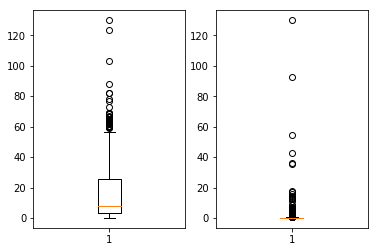

In [32]:
#PLotting the error box plots 

plt.subplot(1, 2,1)
plt.boxplot(errors_f)

plt.subplot(1, 2, 2)
plt.boxplot(errors_nf)

In [33]:
#Experimentation to fix a threshold for classification of a transaction into fraud or non-fraud
print(sum(errors_nf>np.median(errors_f)))
print(sum(errors_f<np.median(errors_f)))
print(sum(errors_f<np.median(errors_nf)))
sum(errors_nf>np.median(errors_nf))

18
192
10


7971

In [34]:
print(errors_nf.shape)
print(errors_f.shape)

(15942,)
(385,)


In [35]:
print(predictions_nf.shape)
print(predictions_f.shape)

(15942, 29)
(385, 29)


In [36]:
test_pred = autoencoder.predict(X_test[:,:29])
test_recon  = (((test_pred-X_test)**2).mean(-1))
print(test_recon)

train_pred = autoencoder.predict(X_train_NF[:,:29])
mean_recon = (((train_pred - X_train_NF)**2).mean(-1).mean())
print(mean_recon)

from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

scores_f1 = []
thres = []

th = 0
for i in range(100):
    th+=0.1
    fraud = (test_recon>mean_recon+th)
    scores_f1.append(f1_score(y_test,fraud))
    thres.append(th+mean_recon)
    

[0.36082535 0.0558622  0.19217769 ... 0.13356274 0.09450706 0.05071564]
0.22520954219491793


In [37]:
X_test.shape

(16327, 29)

2.925209542194919


array([[15876,    66],
       [   90,   295]], dtype=int64)

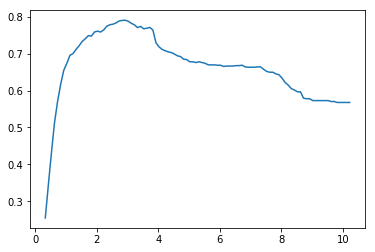

In [38]:
plt.plot(thres, scores_f1)

print(thres[np.array(scores_f1).argmax()])

fraud = (test_recon>thres[np.array(scores_f1).argmax()])

confusion_matrix(y_test, fraud)

In [39]:
##Predicting on Valdation 

predictions_eval=autoencoder.predict(X_eval[:,:29])


In [40]:
errors_eval=np.square(np.subtract(predictions_eval,X_eval[:,:29]))

In [41]:
fraud_eval=(((errors_eval-X_eval[:,:29])**2).mean(-1))>2.925209542194919

In [42]:
print(confusion_matrix(y_true=X_eval[:,29],y_pred=fraud_eval))

[[3680  295]
 [  14   93]]
